<h1 style="color:#2bf0b5;"> <b>Neuroscience</b> HW4-2 - Lachin Naghashyar</h1>

---

<h2 style="color:#f06ff2;"> <b> Raster Plot and PETH</b></h2>

1.

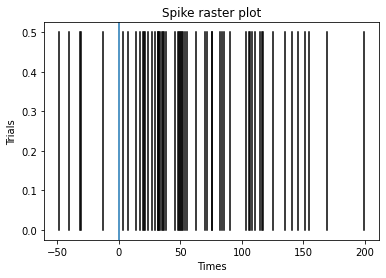

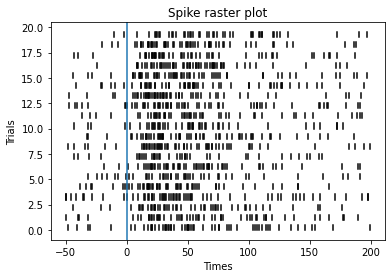

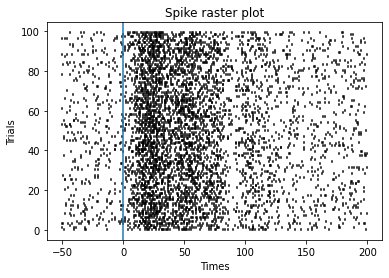

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io


data = scipy.io.loadmat('Q2_data.mat')
trials = np.array(data["trials"])

def plot_raster(num):
    for i in range(num):
        for j in range(500):
            if trials[i, j] == 1:
                x1 = [i,i+0.5]
                x2 = [j/2-50,j/2-50]
                plt.plot(x2,x1,color = 'black')
    plt.axvline(0, 0, 1)
    plt.title('Spike raster plot')
    plt.xlabel('Times')
    plt.ylabel('Trials')
    plt.show()

plot_raster(1)
plot_raster(20)
plot_raster(100)

2. When we are in a stationary state and the network is homogenous, the firing rate of a single neuron is the average population activity ($A_0$). The reason for this is that the temporal average becomes equal to the spatial average (since we can regard the spatial average as the ensemble average of one neuron's activity and that we can use the ergodicity of the process)

3.

In [14]:
def plot_PETH(Dt):
    res = np.zeros((250,))
    for j in range(int(500/Dt)):
        firing_rate = 0
        for i in range(100):
            firing_rate += np.sum(trials[i, j* Dt:j* Dt+Dt])
        res[int(j * Dt/2):int((j* Dt + Dt)/2)] = firing_rate
    plt.title("PETH plot for a bin size of: "+str(Dt))  
    plt.xlabel("Time (ms)")  
    plt.ylabel("Firing rate")
    plt.plot(np.arange(-50, 200),res)
    plt.axvline(0, c='r')
    plt.show()

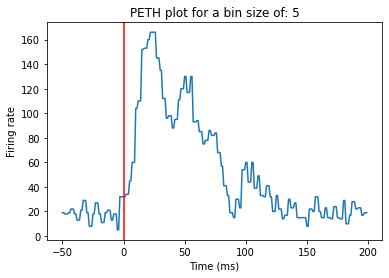

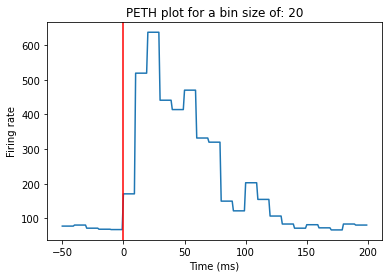

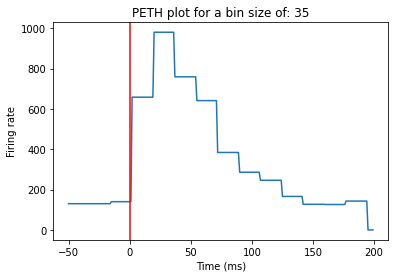

In [15]:
plot_PETH(5)
plot_PETH(20)
plot_PETH(35)

4. Increasing the bin size, makes the firing rates increase and the plot becomes more discrete. The optimal bin size of PETH depends on factors such as the number of trials and the temporal dynamics of the firing rate, also it can be estimated using AIC (https://www.biorxiv.org/content/10.1101/2020.02.06.937367v1.full).
Furthermore, the optimal bin size (assuming an underlying Poisson point process) $\Delta$ is a minimizer of the formula, $(2k-v)/\Delta 2$, where $k$ and $v$ are mean and variance of $ki$ (the number of spikes from all $n$ sequences that fall in the bin $i$).
Given this, it seems like 20 is a better choice than other bin sizes.
Plus, the largeness of data set plays and important rule on defining the bin size too. For large data sets, it is better to use a larger bin size. That being said, we can conclude that 20 is the right choice.